# KNN

引入模組

In [3]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.neighbors import KNeighborsClassifier #使用KNN演算法
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

匯入資料

In [5]:
#from google.colab import files
#files.upload()

In [36]:
df = pd.read_csv('training_X_binary-2%_700詞.csv', index_col=0)
#df = pd.read_csv('training_X_times-2%_700詞.csv', index_col=0)

In [37]:
df

,短多,紙類,年後,董監,盛餘,允強,造紙類,推薦,股三大指,年封關,...,再創新高股,元創近個月,香港及陸股,生技月即將,分析師點名,台灣大賣超,台積電群創,線失而復得,元季增,郭英理表示
三大指,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
header = list(df.columns.values)
df.head

<bound method NDFrame.head of      短多  紙類  年後  董監  盛餘  允強  造紙類  推薦  股三大指  年封關  ...  再創新高股  元創近個月  香港及陸股  \
三大指                                              ...                        
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     1   0   1   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   1     0    0  ...      0      0      0   
1     0   0   0   0   0   0    0   0     1    0  ...      0      0      0   
..   ..  ..  ..  ..  ..  ..  ...  ..   ...  ...  ...    ...    ...    ...   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    

In [39]:
df.info()
print(df.info)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3183 entries, 0 to 0
Columns: 1399 entries, 短多 to 郭英理表示
dtypes: int64(1399)
memory usage: 34.0 MB
<bound method DataFrame.info of      短多  紙類  年後  董監  盛餘  允強  造紙類  推薦  股三大指  年封關  ...  再創新高股  元創近個月  香港及陸股  \
三大指                                              ...                        
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     1   0   1   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   1     0    0  ...      0      0      0   
1     0   0   0   0   0   0    0   0     1    0  ...      0      0      0   
..   ..  ..  ..  ..  ..  ..  ...  ..   ...  ...  ...    ...    ...    ...   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  ...      0      0      0   
0     0   0   0   0   0   0    0   0     0    0  .

In [40]:
df.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
x = df.values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
target_list = []
for i in range(3183):
    if i <= 1692:
        target_list.append(1)
    else:
        target_list.append(0)

In [43]:
#tg = pd.read_csv('training_Y-2_1000詞.csv', index_col=0)

In [44]:
name = ["POS", "NEG"]
target_name = np.array(name)
target_name

array(['POS', 'NEG'], dtype='<U3')

資料準備

In [45]:
#由於KNN分類法是藉由確認最近的觀察值來預測分類，因此變數的比例就會影響很大
#載入標準化比例尺(StandardScaler)套件
from sklearn.preprocessing import StandardScaler

In [46]:
#scaler = StandardScaler()
#scaler.fit(df.drop('TARGET CLASS',axis=1)) #Targer class為資料中目標的那行，就是分類（0/1）？ 到時候要改
#scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
#df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
#df_feat.head()

將資料區分為訓練集與測試集(80% / 20%)

In [47]:
x = df.values 
y = np.array(target_list) 

In [48]:
from sklearn.metrics import classification_report,confusion_matrix #載入classification report & confusion matrix

max_training_set_score: 0.959937156323645
max_test_set_score: 0.598116169544741
[[107 181]
 [ 75 274]]


Text(91.68, 0.5, 'predicted label')

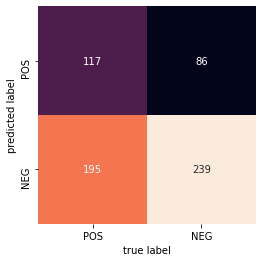

In [70]:
# 跑迴圈數次，看最大可以跑多少
Training_Set_Score = []
Test_Set_Score = []
Confusion_Matrix = []
max_training_set_score = float()
max_test_set_score = float()
max_confusion_matrix = []

for i in range(150):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)  # 套件功能把資料打散分為訓練集跟測試集
    
    knn = KNeighborsClassifier(n_neighbors = 3, p = 2, weights = 'distance', algorithm = 'auto')
    #knn = KNeighborsClassifier(n_neighbors = 3, p = 2, weights = 'uniform', algorithm = 'auto')
    knn.fit(X_train, y_train) 
    pred = knn.predict(X_test)
        
    # 記錄每次的結果,可以print出來看
    #Training_Set_Score.append(modelm.score(X_train,y_train))
    #Test_Set_Score.append(modelm.score(X_test,y_test))
    #Confusion_Matrix.append(confusion_matrix(y_test, labels))
    
    test_set_score = knn.score(X_test,y_test)
    if test_set_score > max_test_set_score:
        max_test_set_score = test_set_score
        max_training_set_score = knn.score(X_train,y_train)
        max_confusion_matrix = confusion_matrix(y_test, pred)
    

#print(Training_Set_Score)
#print(Test_Set_Score)
#print(Confusion_Matrix)

print('max_training_set_score:',max_training_set_score)
print('max_test_set_score:',max_test_set_score)
print(max_confusion_matrix)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

模型建立

In [27]:
knn = KNeighborsClassifier(n_neighbors = 1, p = 2, weights = 'distance', algorithm = 'auto') #從k=1開始測試
#knn = KNeighborsClassifier(n_neighbors = 1, p = 2, weights = 'uniform', algorithm = 'auto') #從k=1開始測試

#主要模型: KNeighborsClassifier
#n_neighbors: 要取幾個鄰居: KNN的K!
#p: 選擇距離的計算方式: 1-曼哈頓距離, 2-歐幾里德距離（一般使用）, 其他數字-明氏距離
#weights: 投票方式為距離等權重或加權: 'uniform'-不管遠近權重都一樣，就是最普通的 KNN 算法的形式, 'distance'-權重和距離成反比，距離預測目標越近具有越高的權重, 其他-自己寫函數
#algorithm:演算法的選擇 (計算效率的考慮): 'auto'-默認參數，自動選擇合適的方法構建模型, 'brute'-蠻力法（資料少可用） , kd_tree'-資料量大, 'ball_tree'-kd很慢可用


knn.fit(X_train, y_train) 
pred = knn.predict(X_test) #預測

In [28]:
knn

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [29]:
#準確度評估
print(knn.score(X_train,y_train))
print(knn.score(X_test, y_test))

0.9984289080911233
0.5368916797488226


測試KNN演算法的好壞

In [30]:
from sklearn.metrics import classification_report,confusion_matrix #載入classification report & confusion matrix
print(confusion_matrix(y_test,pred))

[[ 71 235]
 [ 60 271]]


Text(91.68, 0.5, 'predicted label')

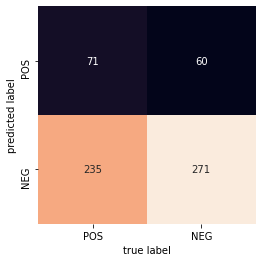

In [31]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.54      0.23      0.32       306
           1       0.54      0.82      0.65       331

    accuracy                           0.54       637
   macro avg       0.54      0.53      0.49       637
weighted avg       0.54      0.54      0.49       637



剛剛只先用了k=1來建立模型，現在利用for loop來建立迴圈，找尋適合的K值

In [53]:
error_rate = []

for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

In [54]:
print(error_rate)

[0.45054945054945056, 0.4662480376766091, 0.45839874411302983, 0.478806907378336, 0.478806907378336, 0.478806907378336, 0.5054945054945055, 0.48665620094191525, 0.47095761381475665, 0.4740973312401884, 0.4489795918367347, 0.44583987441130296, 0.43956043956043955, 0.4411302982731554, 0.4474097331240188, 0.4427001569858713, 0.434850863422292, 0.43956043956043955, 0.44583987441130296, 0.4301412872841444, 0.4489795918367347, 0.44427001569858715, 0.4301412872841444, 0.43956043956043955, 0.4364207221350079, 0.43328100470957615, 0.4489795918367347, 0.45054945054945056, 0.4489795918367347, 0.4521193092621664, 0.4489795918367347, 0.4552590266875981, 0.4599686028257457, 0.4489795918367347, 0.4552590266875981, 0.43956043956043955, 0.44583987441130296, 0.4489795918367347, 0.45054945054945056, 0.46781789638932497, 0.46938775510204084, 0.46153846153846156, 0.4599686028257457, 0.4631083202511774, 0.4599686028257457, 0.4552590266875981, 0.45368916797488223, 0.45368916797488223, 0.46467817896389324, 0.

將k=1~100的錯誤率製圖畫出，找出最低錯誤率的k值

Text(0, 0.5, 'Error Rate')

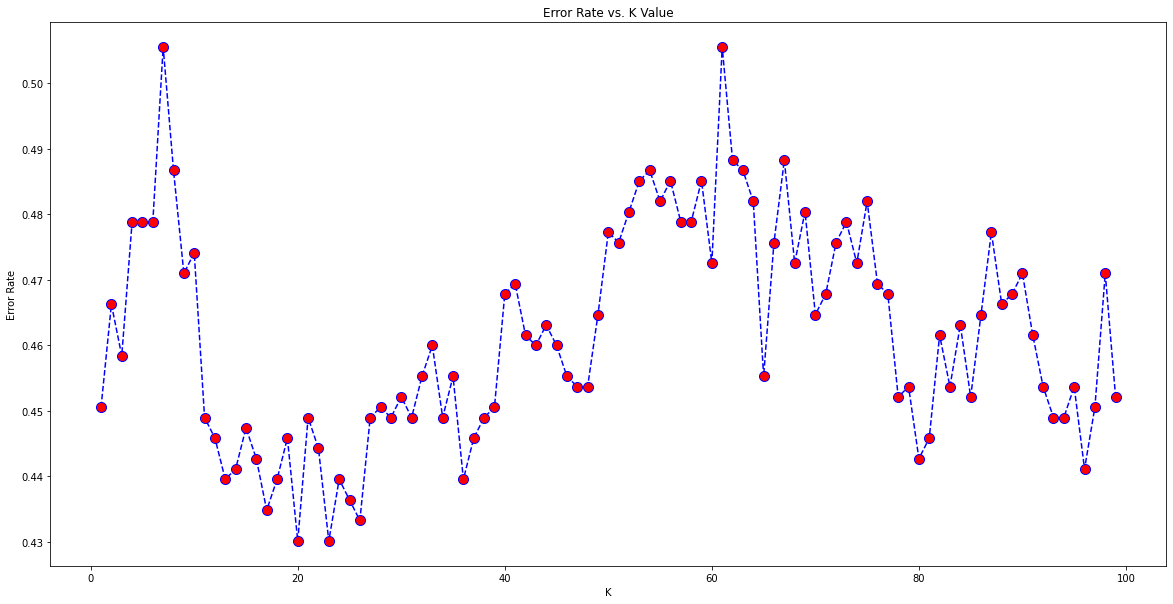

In [55]:
plt.figure(figsize=(20,10))
plt.plot(range(1,100),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

選擇錯誤率最低的K= a， 來看precision、recall、f1-score、support表現

0.6166535742340927
0.5698587127158555
WITH k=1


[[172 130]
 [144 191]]


              precision    recall  f1-score   support

           0       0.54      0.57      0.56       302
           1       0.60      0.57      0.58       335

    accuracy                           0.57       637
   macro avg       0.57      0.57      0.57       637
weighted avg       0.57      0.57      0.57       637

[[140 157]
 [ 89 251]]


Text(91.68, 0.5, 'predicted label')

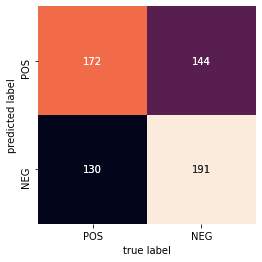

In [59]:
knn = KNeighborsClassifier(n_neighbors = 20) #a要記得改成最好（錯誤率最低）的k值，或者可以改成任意值來看/做比對

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

#準確度評估
print(knn.score(X_train,y_train))
print(knn.score(X_test, y_test))

print('WITH k=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')

print(max_confusion_matrix)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_name, yticklabels=target_name)
plt.xlabel('true label')
plt.ylabel('predicted label')